In [2]:
import matplotlib.pyplot as plt
from matplotlib import ticker
import numpy as np
import scipy.io 
import sys
sys.path.append('/Users/yjzhu/Desktop/Solar/MyPy')
import juanfit
import importlib
importlib.reload(juanfit)
from juanfit import SpectrumFitSingle, SpectrumFitRow
from juanfit import gaussian
import cmcrameri.cm as cmcm
import sumerpy
importlib.reload(sumerpy)
from sumerpy import con_width_funct_4, radiometry

In [3]:
sumer_img = scipy.io.readsav("../../save/sumer_merg.sav")["int_merg"]
wvl_509 = np.linspace(0,1023,1024)*0.04381162280734919 + 1015.1032588901901
sumer_509_window = sumer_img[:,2048:3072]
sumer_509_window.shape
sumer_ycen = 1119.81
sumer_ycoord = np.linspace(sumer_ycen-299.2/2,sumer_ycen+299.2/2,300) - 5
np.set_printoptions(precision=2)

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log10
  
/anaconda3/lib/python3.7/site-packages/matplotlib/colors.py:620: RuntimeWarning: overflow encountered in multiply
  xa *= self.N


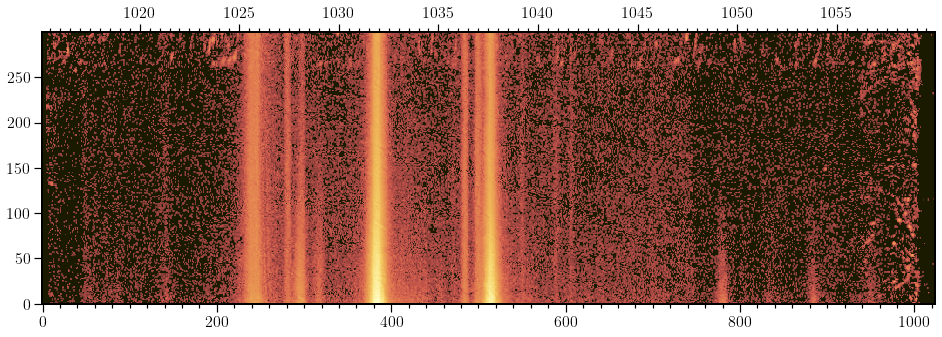

In [4]:
fig, ax = plt.subplots(figsize=(16,5))
ax.pcolormesh(np.arange(1024),np.arange(299,-1,-1),np.nan_to_num(np.log10(sumer_509_window),nan=-np.inf),
                  cmap=cmcm.lajolla_r,shading="auto",vmin=-5)

ax_wvl = ax.twiny()
ax_wvl.set_xlim(wvl_509[0],wvl_509[-1])
ax.xaxis.set_minor_locator(ticker.AutoMinorLocator(10))
ax_wvl.xaxis.set_minor_locator(ticker.AutoMinorLocator(10))
for ax_ in (ax, ax_wvl):
    ax_.tick_params(labelsize=16)
    ax_.tick_params(which="major",width=1.2,length=8)
    ax_.tick_params(which="minor",width=1.2,length=4)

/Users/yjzhu/Desktop/Solar/MyPy/sumerpy.py:457: UserWarning: No test phase set by default.
  warn("No test phase set by default.")


<AxesSubplot:title={'center':'\\textbf{O \\textsc{i} 1027 \\& 1028 \\mbox{\\AA} \\& Fe \\textsc{x} 1028 \\mbox{\\AA}}'}, ylabel='Intensity $\\mathrm{[erg\\cdot s^{-1}\\cdot m^{-2}\\cdot}$ \\mbox{\\AA}$\\mathrm{^{-1}\\cdot sr^{-1}]}$'>

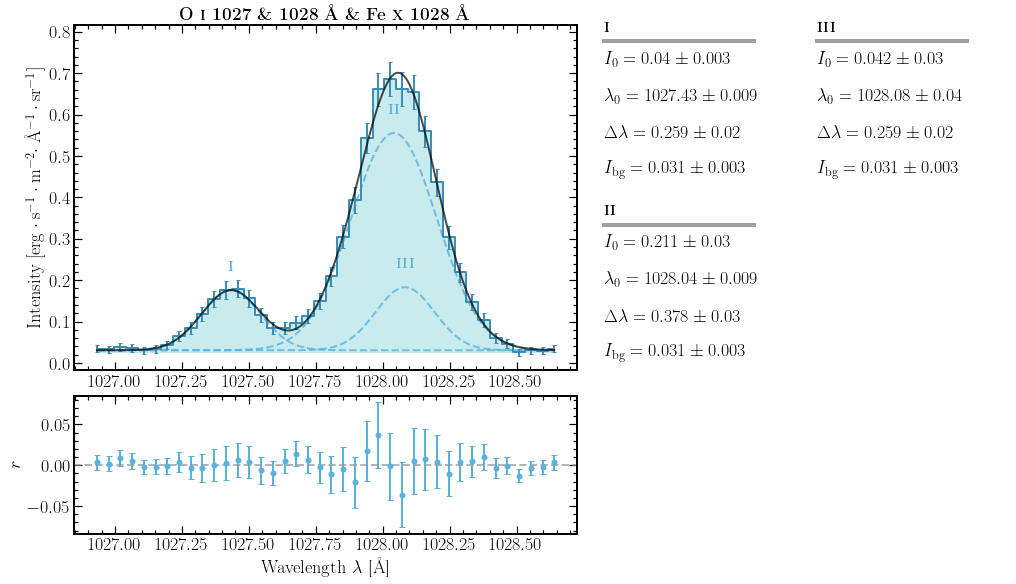

In [30]:
FeX_OI_1028_slice = (270,310)
wvl_FeX_OI_1028 = wvl_509[FeX_OI_1028_slice[0]:FeX_OI_1028_slice[1]]
radiometry_FeX_OI_1028 = radiometry(1,wvl_FeX_OI_1028,1,np.ones_like(wvl_FeX_OI_1028),bare=False,kbr=True,photons=False,watts=True,det_a=False,
                                det_b=True,joint=False,separate=True)*1.e3
int_FeX_OI_1028 = np.average(sumer_509_window[-30:,FeX_OI_1028_slice[0]:FeX_OI_1028_slice[1]],axis=0)*radiometry_FeX_OI_1028
err_FeX_OI_1028 = np.sqrt(np.sum(300*sumer_509_window[-30:,FeX_OI_1028_slice[0]:FeX_OI_1028_slice[1]],
                        axis=0))/30/300*radiometry_FeX_OI_1028
                        
FeX_OI_1028_fit_model = SpectrumFitSingle(data=int_FeX_OI_1028,wvl=wvl_FeX_OI_1028,err=err_FeX_OI_1028,
                                      same_width=[True,False,True],line_number=3,line_wvl_init=[1027.35,1028.04,1028.15],
                                      int_max_init=[0.2,0.7,0.3],fwhm_init=[0.2,0.2,0.2])
#FeX_OI_1028_fit_model.plot(plot_fit=False,plot_params=False)
FeX_OI_1028_fit_model.run_lse()
#FeX_OI_1028_fit_model.run_HahnMC(n_chain=10000)
FeX_OI_1028_fit_model.plot(plot_title=r"\textbf{O \textsc{i} 1027 \& 1028 \mbox{\AA} \& Fe \textsc{x} 1028 \mbox{\AA}}",
                                 xlabel=r"Wavelength $\lambda$ [\mbox{\AA}]",
                               ylabel=r"Intensity $\mathrm{[erg\cdot s^{-1}\cdot m^{-2}\cdot}$ \mbox{\AA}$\mathrm{^{-1}\cdot sr^{-1}]}$",
                              color_style="Blue")

/Users/yjzhu/Desktop/Solar/MyPy/juanfit.py:455: UserWarning: Use custom function in the fitting. Will not plot fitted parameters.
  warn("Use custom function in the fitting. Will not plot fitted parameters.")


FWHM after removing instrumental broadening:  [179.07 300.64 179.07]


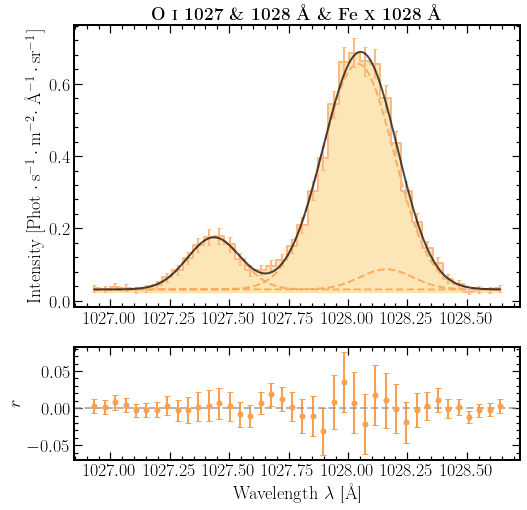

In [33]:
def FeX_OI_fit_func(wvl,int1,int2,int3,wvl1,wvl2,fwhm1,fwhm2,int_cont):
    return gaussian(wvl,wvl1,int1,fwhm1) + gaussian(wvl,wvl2,int2,fwhm2) + \
             + gaussian(wvl,wvl1+1028.157-1027.431,int3,fwhm1) + int_cont

FeX_OI_1028_fit_model = SpectrumFitSingle(data=int_FeX_OI_1028,wvl=wvl_FeX_OI_1028,err=err_FeX_OI_1028,custom_func=FeX_OI_fit_func,
                                      custom_init=[0.2,0.7,0.3,1027.43,1028.04,0.2,0.2,0.05])
#FeX_OI_1028_fit_model.plot(plot_fit=False,plot_params=False)
FeX_OI_1028_fit_model.run_lse()
#FeX_OI_1028_fit_model.run_HahnMC(n_chain=10000)
ax = FeX_OI_1028_fit_model.plot(plot_title=r"\textbf{O \textsc{i} 1027 \& 1028 \mbox{\AA} \& Fe \textsc{x} 1028 \mbox{\AA}}",
                                 xlabel=r"Wavelength $\lambda$ [\mbox{\AA}]",
                               ylabel=r"Intensity $\mathrm{[Phot\cdot s^{-1}\cdot m^{-2}\cdot}$ \mbox{\AA}$\mathrm{^{-1}\cdot sr^{-1}]}$",
                              color_style="Yellow")
ax.plot(FeX_OI_1028_fit_model.wvl_plot,gaussian(FeX_OI_1028_fit_model.wvl_plot,FeX_OI_1028_fit_model.custom_fit[3],
        FeX_OI_1028_fit_model.custom_fit[0],FeX_OI_1028_fit_model.custom_fit[5])+FeX_OI_1028_fit_model.custom_fit[-1],
        lw=2,alpha=0.8,ls="--",color="#FC9F4D")
ax.plot(FeX_OI_1028_fit_model.wvl_plot,gaussian(FeX_OI_1028_fit_model.wvl_plot,FeX_OI_1028_fit_model.custom_fit[4],
        FeX_OI_1028_fit_model.custom_fit[1],FeX_OI_1028_fit_model.custom_fit[6])+FeX_OI_1028_fit_model.custom_fit[-1],
        lw=2,alpha=0.8,ls="--",color="#FC9F4D")
ax.plot(FeX_OI_1028_fit_model.wvl_plot,gaussian(FeX_OI_1028_fit_model.wvl_plot,FeX_OI_1028_fit_model.custom_fit[3]+1028.157-1027.431,
        FeX_OI_1028_fit_model.custom_fit[2],FeX_OI_1028_fit_model.custom_fit[5])+FeX_OI_1028_fit_model.custom_fit[-1],
        lw=2,alpha=0.8,ls="--",color="#FC9F4D")
print("FWHM after removing instrumental broadening: ",
con_width_funct_4(1,np.concatenate((FeX_OI_1028_fit_model.custom_fit[3:5],FeX_OI_1028_fit_model.custom_fit[3]+1028.157-1027.431),axis=None),
1,np.concatenate((FeX_OI_1028_fit_model.custom_fit[5:7],FeX_OI_1028_fit_model.custom_fit[5]),axis=None)*1000,DET_B=True))

In [34]:
print(FeX_OI_1028_fit_model.custom_fit[4])
print(FeX_OI_1028_fit_model.custom_fit[6])
print(FeX_OI_1028_fit_model.custom_err[6])


1028.0423732413217
0.3554443730836356
0.010939299043401024


/Users/yjzhu/Desktop/Solar/MyPy/sumerpy.py:457: UserWarning: No test phase set by default.
  warn("No test phase set by default.")


FWHM after removing instrumental broadening:  [260.51]


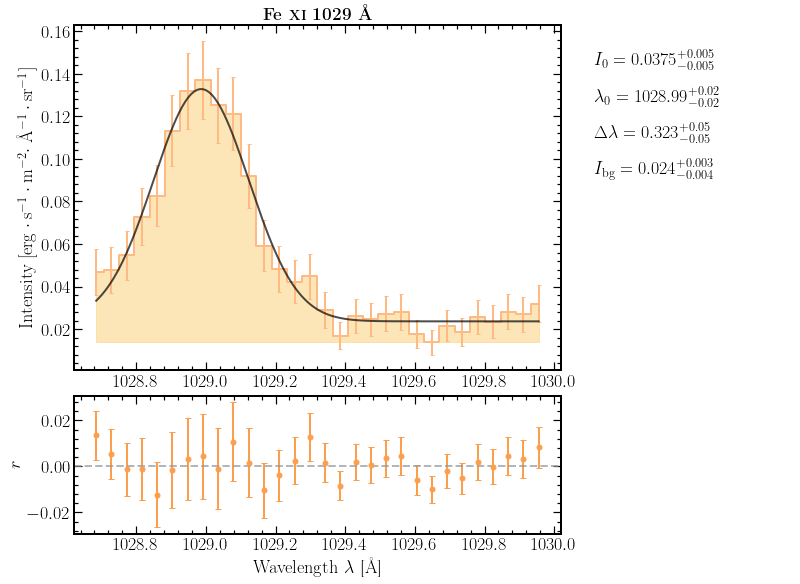

In [36]:
FeXI_1029_slice = (310,340)
wvl_FeXI_1029 = wvl_509[FeXI_1029_slice[0]:FeXI_1029_slice[1]]
radiometry_FeXI_1029 = radiometry(1,wvl_FeXI_1029,1,np.ones_like(wvl_FeXI_1029),bare=False,kbr=True,photons=False,watts=True,det_a=False,
                                det_b=True,joint=False,separate=True)*1.e3
int_FeXI_1029 = np.average(sumer_509_window[-30:,FeXI_1029_slice[0]:FeXI_1029_slice[1]],axis=0)*radiometry_FeXI_1029
err_FeXI_1029 = np.sqrt(np.sum(300*sumer_509_window[-30:,FeXI_1029_slice[0]:FeXI_1029_slice[1]],
                        axis=0))/30/300*radiometry_FeXI_1029

FeXI_1029_fit_model = SpectrumFitSingle(data=int_FeXI_1029,wvl=wvl_FeXI_1029,err=err_FeXI_1029,
                                      same_width=False,line_number=1,line_wvl_init=[1029],
                                      int_max_init=[0.1],fwhm_init=[0.2])
#FeXI_1029_fit_model.plot(plot_fit=False,plot_params=False)
#FeXI_1029_fit_model.run_lse()
FeXI_1029_fit_model.run_HahnMC(n_chain=10000)
FeXI_1029_fit_model.plot(plot_title=r"\textbf{Fe \textsc{xi} 1029 \mbox{\AA}}",plot_hmc=True,
                                 xlabel=r"Wavelength $\lambda$ [\mbox{\AA}]",
                               ylabel=r"Intensity $\mathrm{[erg\cdot s^{-1}\cdot m^{-2}\cdot}$ \mbox{\AA}$\mathrm{^{-1}\cdot sr^{-1}]}$",
                              color_style="Yellow")
print("FWHM after removing instrumental broadening: ",
con_width_funct_4(1,FeXI_1029_fit_model.line_wvl_fit_hmc,1,FeXI_1029_fit_model.fwhm_fit_hmc*1000,DET_B=True))

/Users/yjzhu/Desktop/Solar/MyPy/sumerpy.py:457: UserWarning: No test phase set by default.
  warn("No test phase set by default.")


FWHM after removing instrumental broadening:  [288.29]


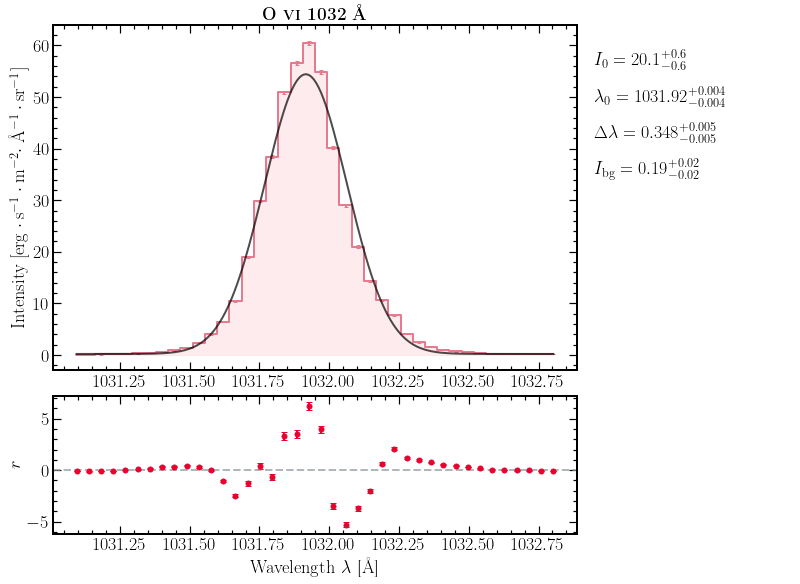

In [37]:
OVI_1032_slice = (365,405)
wvl_OVI_1032 = wvl_509[OVI_1032_slice[0]:OVI_1032_slice[1]]
radiometry_OVI_1032 = radiometry(1,wvl_OVI_1032,1,np.ones_like(wvl_OVI_1032),bare=False,kbr=True,photons=False,watts=True,det_a=False,
                                det_b=True,joint=False,separate=True)*1.e3
int_OVI_1032 = np.average(sumer_509_window[-30:,OVI_1032_slice[0]:OVI_1032_slice[1]],axis=0)*radiometry_OVI_1032
err_OVI_1032 = np.sqrt(np.sum(300*sumer_509_window[-30:,OVI_1032_slice[0]:OVI_1032_slice[1]],
                        axis=0))/30/300*radiometry_OVI_1032

OVI_1032_fit_model = SpectrumFitSingle(data=int_OVI_1032,wvl=wvl_OVI_1032,err=err_OVI_1032,
                                      same_width=False,line_number=1,line_wvl_init=[1032],
                                      int_max_init=[10],fwhm_init=[0.2])
#OVI_1032_fit_model.plot(plot_fit=False,plot_params=False)
#OVI_1032_fit_model.run_lse()
OVI_1032_fit_model.run_HahnMC(n_chain=10000)
OVI_1032_fit_model.plot(plot_title=r"\textbf{O \textsc{vi} 1032 \mbox{\AA}}",plot_hmc=True,
                                 xlabel=r"Wavelength $\lambda$ [\mbox{\AA}]",
                               ylabel=r"Intensity $\mathrm{[erg\cdot s^{-1}\cdot m^{-2}\cdot}$ \mbox{\AA}$\mathrm{^{-1}\cdot sr^{-1}]}$",
                              color_style="Red")
print("FWHM after removing instrumental broadening: ",
con_width_funct_4(1,OVI_1032_fit_model.line_wvl_fit_hmc,1,OVI_1032_fit_model.fwhm_fit*1000,DET_B=True))

FWHM after removing instrumental broadening:  [156.55 398.47]


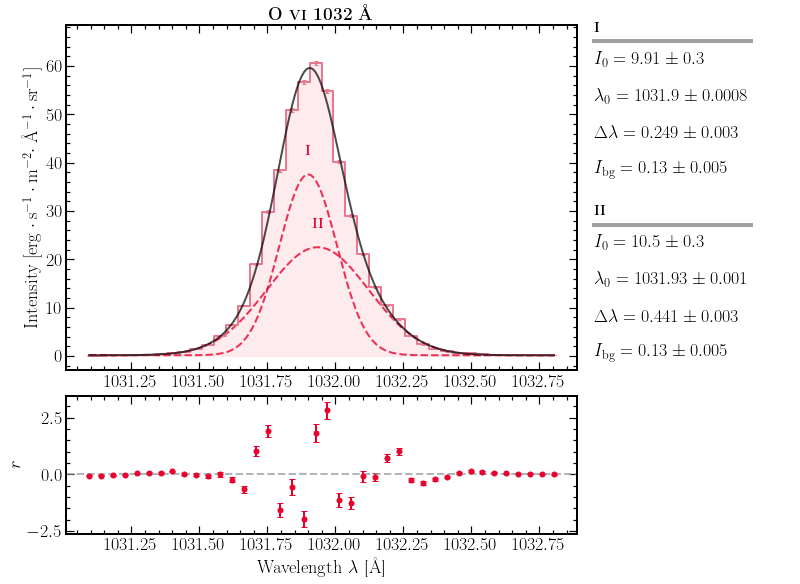

In [39]:
OVI_1032_fit_model = SpectrumFitSingle(data=int_OVI_1032,wvl=wvl_OVI_1032,err=err_OVI_1032,
                                      same_width=False,line_number=2,line_wvl_init=[1031.93,1031.93],
                                      int_max_init=[60,5],fwhm_init=[0.3,0.6])
#OVI_1032_fit_model.plot(plot_fit=False,plot_params=False)
OVI_1032_fit_model.run_lse()
#OVI_1032_fit_model.run_HahnMC(n_chain=10000)
OVI_1032_fit_model.plot(plot_title=r"\textbf{O \textsc{vi} 1032 \mbox{\AA}}",plot_hmc=False,
                                 xlabel=r"Wavelength $\lambda$ [\mbox{\AA}]",
                               ylabel=r"Intensity $\mathrm{[erg\cdot s^{-1}\cdot m^{-2}\cdot}$ \mbox{\AA}$\mathrm{^{-1}\cdot sr^{-1}]}$",
                              color_style="Red")
print("FWHM after removing instrumental broadening: ",
con_width_funct_4(1,OVI_1032_fit_model.line_wvl_fit,1,OVI_1032_fit_model.fwhm_fit*1000,DET_B=True))

/Users/yjzhu/Desktop/Solar/MyPy/sumerpy.py:457: UserWarning: No test phase set by default.
  warn("No test phase set by default.")
/Users/yjzhu/Desktop/Solar/MyPy/juanfit.py:455: UserWarning: Use custom function in the fitting. Will not plot fitted parameters.
  warn("Use custom function in the fitting. Will not plot fitted parameters.")


fitted FWHM: 0.309 +/- 0.001  0.600 +/- 0.004
fitted wavelength: 1031.910 +/- 0.000  1031.960 +/- 0.002


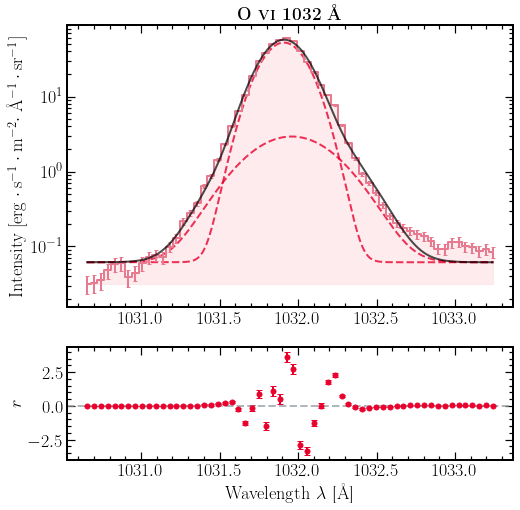

In [61]:
OVI_1032_slice = (355,415)
wvl_OVI_1032 = wvl_509[OVI_1032_slice[0]:OVI_1032_slice[1]]
radiometry_OVI_1032 = radiometry(1,wvl_OVI_1032,1,np.ones_like(wvl_OVI_1032),bare=False,kbr=True,photons=False,watts=True,det_a=False,
                                det_b=True,joint=False,separate=True)*1.e3
int_OVI_1032 = np.average(sumer_509_window[-30:,OVI_1032_slice[0]:OVI_1032_slice[1]],axis=0)*radiometry_OVI_1032
err_OVI_1032 = np.sqrt(np.sum(300*sumer_509_window[-30:,OVI_1032_slice[0]:OVI_1032_slice[1]],
                        axis=0))/30/300*radiometry_OVI_1032

def OVI_1032_double_gaussian_func(wvl,int1,wvl1,wvl2,fwhm1,fwhm2,int_cont):
    return gaussian(wvl,wvl1,int1,fwhm1) + gaussian(wvl,wvl2,2.012*1.58,fwhm2) + int_cont

OVI_1032_fit_model = SpectrumFitSingle(data=int_OVI_1032,wvl=wvl_OVI_1032,err=err_OVI_1032,
                                      custom_func=OVI_1032_double_gaussian_func,custom_init=[60,1031.9,1031.9,0.24,0.4,0.21])
#OVI_1032_fit_model.plot(plot_fit=False,plot_params=False)
OVI_1032_fit_model.run_lse()
ax = OVI_1032_fit_model.plot(plot_title=r"\textbf{O \textsc{vi} 1032 \mbox{\AA}}",plot_hmc=False,
                                 xlabel=r"Wavelength $\lambda$ [\mbox{\AA}]",
                               ylabel=r"Intensity $\mathrm{[erg\cdot s^{-1}\cdot m^{-2}\cdot}$ \mbox{\AA}$\mathrm{^{-1}\cdot sr^{-1}]}$")
ax.plot(OVI_1032_fit_model.wvl_plot,gaussian(OVI_1032_fit_model.wvl_plot,OVI_1032_fit_model.custom_fit[1],
        OVI_1032_fit_model.custom_fit[0],OVI_1032_fit_model.custom_fit[3])+OVI_1032_fit_model.custom_fit[-1],
        lw=2,alpha=0.8,ls="--",color="#E9002D")
ax.plot(OVI_1032_fit_model.wvl_plot,gaussian(OVI_1032_fit_model.wvl_plot,OVI_1032_fit_model.custom_fit[2],
        0.494*3.71,OVI_1032_fit_model.custom_fit[4])+OVI_1032_fit_model.custom_fit[-1],
        lw=2,alpha=0.8,ls="--",color="#E9002D")
print("fitted FWHM: {:.3f} +/- {:.3f}  {:.3f} +/- {:.3f}".format(OVI_1032_fit_model.custom_fit[3],
                                                                OVI_1032_fit_model.custom_err[3],
                                                                OVI_1032_fit_model.custom_fit[4],
                                                                OVI_1032_fit_model.custom_err[4]))

print("fitted wavelength: {:.3f} +/- {:.3f}  {:.3f} +/- {:.3f}".format(OVI_1032_fit_model.custom_fit[1],
                                                                OVI_1032_fit_model.custom_err[1],
                                                                OVI_1032_fit_model.custom_fit[2],
                                                                OVI_1032_fit_model.custom_err[2]))
ax.set_yscale("log")
# print("FWHM after removing instrumental broadening: ",
# con_width_funct_4(1,OVI_1032_fit_model.line_wvl_fit,1,OVI_1032_fit_model.fwhm_fit*1000,DET_B=True))

/Users/yjzhu/Desktop/Solar/MyPy/juanfit.py:196: UserWarning: No input errors, absolute_sigma=False will be used in the Chi2 fitting.
  warn("No input errors, absolute_sigma=False will be used in the Chi2 fitting.")
No handles with labels found to put in legend.


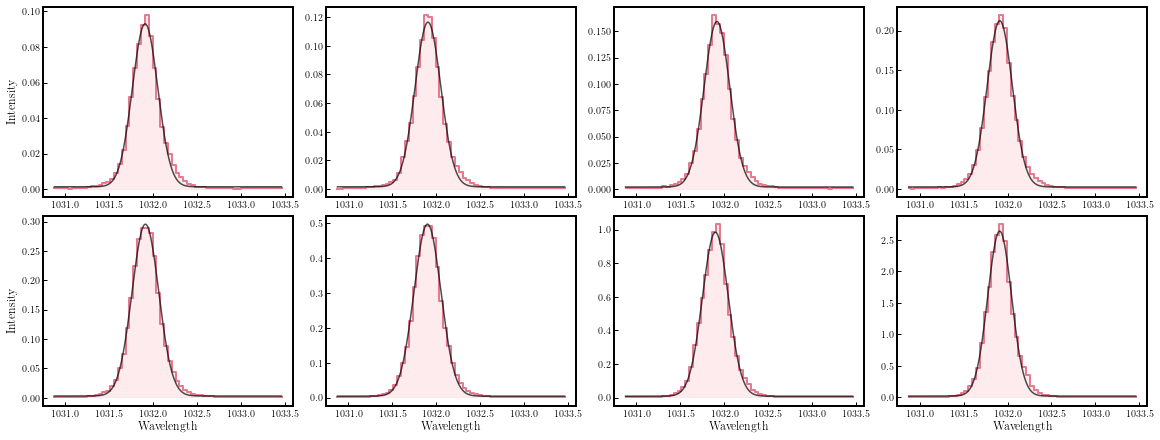

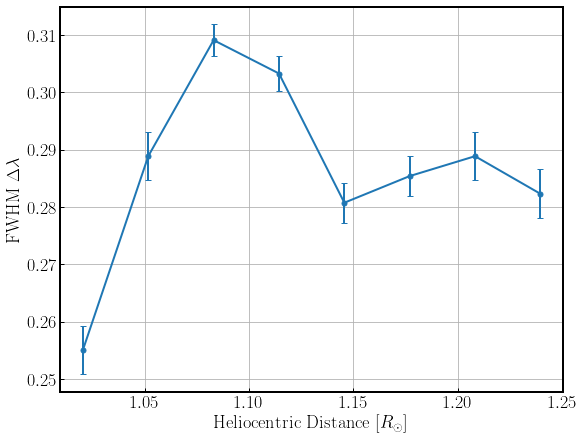

In [25]:
int_OVI_1032_row = np.average(sumer_509_window[-240:,OVI_1032_slice[0]:OVI_1032_slice[1]].reshape(-1,30,OVI_1032_slice[1]-OVI_1032_slice[0]),axis=1)

OVI_1032_fit_row_model = SpectrumFitRow(data=int_OVI_1032_row,wvl=wvl_OVI_1032,err=None,
                                      same_width=False,line_number=1,line_wvl_init=[1032],
                                      int_max_init=[2.5],fwhm_init=[0.2])
OVI_1032_fit_row_model.run_lse()
OVI_1032_fit_row_model.plot_fit()
OVI_1032_fit_row_model.fwhm_fit = con_width_funct_4(1,OVI_1032_fit_row_model.line_wvl_fit,1, OVI_1032_fit_row_model.fwhm_fit*1000,DET_B=True)/1000
ax = OVI_1032_fit_row_model.plot_variation(xdata=np.flip(np.average(sumer_ycoord[:240].reshape(-1,30),axis=1))/960,
                                            xlabel=r"Heliocentric Distance $\left[R_\odot \right]$")
ax.grid("on")

/Users/yjzhu/Desktop/Solar/MyPy/sumerpy.py:457: UserWarning: No test phase set by default.
  warn("No test phase set by default.")


FWHM after removing instrumental broadening:  [286.01]


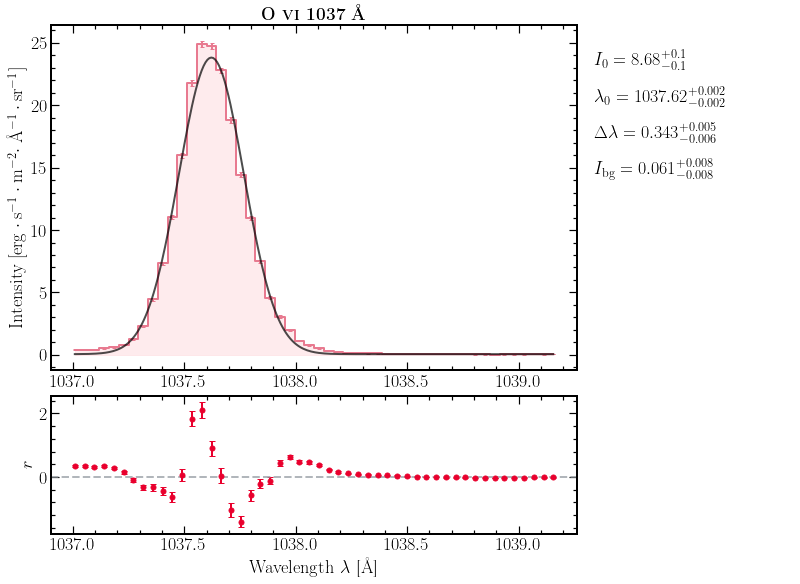

In [49]:
OVI_1037_slice = (500,550)
wvl_OVI_1037 = wvl_509[OVI_1037_slice[0]:OVI_1037_slice[1]]
radiometry_OVI_1037 = radiometry(1,wvl_OVI_1037,1,np.ones_like(wvl_OVI_1037),bare=False,kbr=True,photons=False,watts=True,det_a=False,
                                det_b=True,joint=False,separate=True)*1.e3
int_OVI_1037 = np.average(sumer_509_window[-30:,OVI_1037_slice[0]:OVI_1037_slice[1]],axis=0)*radiometry_OVI_1037
err_OVI_1037 = np.sqrt(np.sum(300*sumer_509_window[-30:,OVI_1037_slice[0]:OVI_1037_slice[1]],
                        axis=0))/30/300*radiometry_OVI_1037

OVI_1037_fit_model = SpectrumFitSingle(data=int_OVI_1037,wvl=wvl_OVI_1037,err=err_OVI_1037,
                                      same_width=False,line_number=1,line_wvl_init=[1037.6],
                                      int_max_init=[10],fwhm_init=[0.2])
#OVI_1037_fit_model.plot(plot_fit=False,plot_params=False)
#OVI_1037_fit_model.run_lse()
OVI_1037_fit_model.run_HahnMC(n_chain=10000)
OVI_1037_fit_model.plot(plot_title=r"\textbf{O \textsc{vi} 1037 \mbox{\AA}}",plot_hmc=True,
                                 xlabel=r"Wavelength $\lambda$ [\mbox{\AA}]",
                               ylabel=r"Intensity $\mathrm{[erg\cdot s^{-1}\cdot m^{-2}\cdot}$ \mbox{\AA}$\mathrm{^{-1}\cdot sr^{-1}]}$",
                              color_style="Red")
print("FWHM after removing instrumental broadening: ",
con_width_funct_4(1,OVI_1037_fit_model.line_wvl_fit_hmc,1,OVI_1037_fit_model.fwhm_fit_hmc*1000,DET_B=True))

/Users/yjzhu/Desktop/Solar/MyPy/juanfit.py:455: UserWarning: Use custom function in the fitting. Will not plot fitted parameters.
  warn("Use custom function in the fitting. Will not plot fitted parameters.")


fitted FWHM: 0.246 +/- 0.009  0.346 +/- 0.001


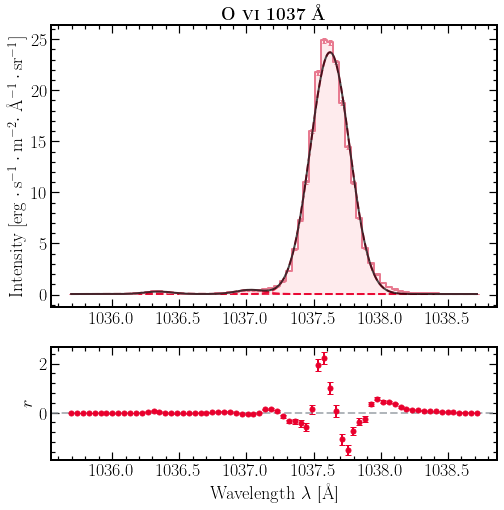

In [57]:
def OVI_1037_CII_1036_func(wvl,int1,int2,int3,wvl1,wvl2,fwhm1,fwhm2,int_cont):
    return gaussian(wvl,wvl1,int1,fwhm1) + gaussian(wvl,wvl1+1037.018-1036.337,int2,fwhm1) + \
      + gaussian(wvl,wvl2,int3,fwhm2) + int_cont

OVI_1037_fit_model = SpectrumFitSingle(data=int_OVI_1037,wvl=wvl_OVI_1037,err=err_OVI_1037,
                                      custom_func=OVI_1037_CII_1036_func,
                                      custom_init=[0.5,1,25,1036.33,1037.62,0.3,0.3,0.07])
#OVI_1037_fit_model.plot(plot_fit=False,plot_params=False)
OVI_1037_fit_model.run_lse()
# OVI_1037_fit_model.run_HahnMC(n_chain=10000)
ax = OVI_1037_fit_model.plot(plot_title=r"\textbf{O \textsc{vi} 1037 \mbox{\AA}}",plot_hmc=False,
                                 xlabel=r"Wavelength $\lambda$ [\mbox{\AA}]",
                               ylabel=r"Intensity $\mathrm{[erg\cdot s^{-1}\cdot m^{-2}\cdot}$ \mbox{\AA}$\mathrm{^{-1}\cdot sr^{-1}]}$",
                              color_style="Red")
ax.plot(OVI_1037_fit_model.wvl_plot,gaussian(OVI_1037_fit_model.wvl_plot,OVI_1037_fit_model.custom_fit[3],
        OVI_1037_fit_model.custom_fit[0],OVI_1037_fit_model.custom_fit[5])+OVI_1037_fit_model.custom_fit[-1],
        lw=2,alpha=0.8,ls="--",color="#E9002D")
ax.plot(OVI_1037_fit_model.wvl_plot,gaussian(OVI_1037_fit_model.wvl_plot,OVI_1037_fit_model.custom_fit[3]+1037.018-1036.337,
        OVI_1037_fit_model.custom_fit[1],OVI_1037_fit_model.custom_fit[5])+OVI_1037_fit_model.custom_fit[-1],
        lw=2,alpha=0.8,ls="--",color="#E9002D")
ax.plot(OVI_1037_fit_model.wvl_plot,gaussian(OVI_1037_fit_model.wvl_plot,OVI_1037_fit_model.custom_fit[4],
        OVI_1037_fit_model.custom_fit[2],OVI_1037_fit_model.custom_fit[6])+OVI_1037_fit_model.custom_fit[-1],
        lw=2,alpha=0.8,ls="--",color="#E9002D")

print("fitted FWHM: {:.3f} +/- {:.3f}  {:.3f} +/- {:.3f}".format(OVI_1037_fit_model.custom_fit[5],
                                                                OVI_1037_fit_model.custom_err[5],
                                                                OVI_1037_fit_model.custom_fit[6],
                                                                OVI_1037_fit_model.custom_err[6]))
# print("FWHM after removing instrumental broadening: ",
# con_width_funct_4(1,OVI_1037_fit_model.line_wvl_fit_hmc,1,OVI_1037_fit_model.fwhm_fit_hmc*1000,DET_B=True))

/Users/yjzhu/Desktop/Solar/MyPy/juanfit.py:455: UserWarning: Use custom function in the fitting. Will not plot fitted parameters.
  warn("Use custom function in the fitting. Will not plot fitted parameters.")


fitted FWHM: 0.249 +/- 0.009 
 0.293 +/- 0.003 
 0.488 +/- 0.008
fitted wavelength: 1036.336 +/- 0.004 
 1037.610 +/- 0.001 
 1037.664 +/- 0.004


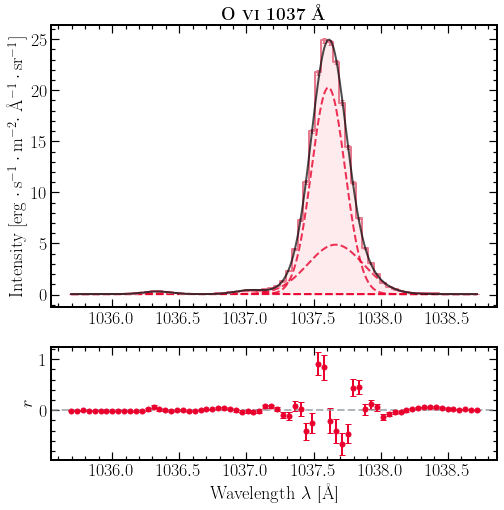

In [67]:
def OVI_1037_CII_1036_func(wvl,int1,int2,int3,int4,wvl1,wvl2,wvl3,fwhm1,fwhm2,fwhm3,int_cont):
    return gaussian(wvl,wvl1,int1,fwhm1) + gaussian(wvl,wvl1+1037.018-1036.337,int2,fwhm1) + \
      + gaussian(wvl,wvl2,int3,fwhm2) + gaussian(wvl,wvl3,int4,fwhm3) + int_cont

OVI_1037_fit_model = SpectrumFitSingle(data=int_OVI_1037,wvl=wvl_OVI_1037,err=err_OVI_1037,
                                      custom_func=OVI_1037_CII_1036_func,
                                      custom_init=[0.5,1,25,2,1036.33,1037.62,1037.64,0.3,0.3,0.6,0.07])
#OVI_1037_fit_model.plot(plot_fit=False,plot_params=False)
OVI_1037_fit_model.run_lse()
# OVI_1037_fit_model.run_HahnMC(n_chain=10000)
ax = OVI_1037_fit_model.plot(plot_title=r"\textbf{O \textsc{vi} 1037 \mbox{\AA}}",plot_hmc=False,
                                 xlabel=r"Wavelength $\lambda$ [\mbox{\AA}]",
                               ylabel=r"Intensity $\mathrm{[erg\cdot s^{-1}\cdot m^{-2}\cdot}$ \mbox{\AA}$\mathrm{^{-1}\cdot sr^{-1}]}$",
                              color_style="Red")
ax.plot(OVI_1037_fit_model.wvl_plot,gaussian(OVI_1037_fit_model.wvl_plot,OVI_1037_fit_model.custom_fit[4],
        OVI_1037_fit_model.custom_fit[0],OVI_1037_fit_model.custom_fit[7])+OVI_1037_fit_model.custom_fit[-1],
        lw=2,alpha=0.8,ls="--",color="#E9002D")
ax.plot(OVI_1037_fit_model.wvl_plot,gaussian(OVI_1037_fit_model.wvl_plot,OVI_1037_fit_model.custom_fit[4]+1037.018-1036.337,
        OVI_1037_fit_model.custom_fit[1],OVI_1037_fit_model.custom_fit[7])+OVI_1037_fit_model.custom_fit[-1],
        lw=2,alpha=0.8,ls="--",color="#E9002D")
ax.plot(OVI_1037_fit_model.wvl_plot,gaussian(OVI_1037_fit_model.wvl_plot,OVI_1037_fit_model.custom_fit[5],
        OVI_1037_fit_model.custom_fit[2],OVI_1037_fit_model.custom_fit[8])+OVI_1037_fit_model.custom_fit[-1],
        lw=2,alpha=0.8,ls="--",color="#E9002D")
ax.plot(OVI_1037_fit_model.wvl_plot,gaussian(OVI_1037_fit_model.wvl_plot,OVI_1037_fit_model.custom_fit[6],
        OVI_1037_fit_model.custom_fit[3],OVI_1037_fit_model.custom_fit[9])+OVI_1037_fit_model.custom_fit[-1],
        lw=2,alpha=0.8,ls="--",color="#E9002D")

print("fitted FWHM: {:.3f} +/- {:.3f} \n {:.3f} +/- {:.3f} \n {:.3f} +/- {:.3f}".format(OVI_1037_fit_model.custom_fit[7],
                                                                OVI_1037_fit_model.custom_err[7],
                                                                OVI_1037_fit_model.custom_fit[8],
                                                                OVI_1037_fit_model.custom_err[8],
                                                                OVI_1037_fit_model.custom_fit[9],
                                                                OVI_1037_fit_model.custom_err[9]))

print("fitted wavelength: {:.3f} +/- {:.3f} \n {:.3f} +/- {:.3f} \n {:.3f} +/- {:.3f}".format(OVI_1037_fit_model.custom_fit[4],
                                                                OVI_1037_fit_model.custom_err[4],
                                                                OVI_1037_fit_model.custom_fit[5],
                                                                OVI_1037_fit_model.custom_err[5],
                                                                OVI_1037_fit_model.custom_fit[6],
                                                                OVI_1037_fit_model.custom_err[6]))
# print("FWHM after removing instrumental broadening: ",
# con_width_funct_4(1,OVI_1037_fit_model.line_wvl_fit_hmc,1,OVI_1037_fit_model.fwhm_fit_hmc*1000,DET_B=True))

FWHM after removing instrumental broadening:  [239.66 583.1 ]


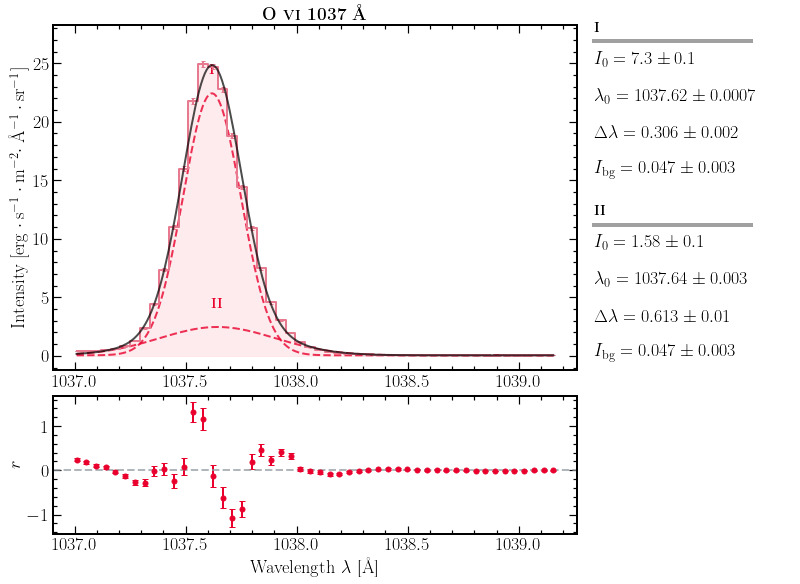

In [44]:
OVI_1037_fit_model = SpectrumFitSingle(data=int_OVI_1037,wvl=wvl_OVI_1037,err=err_OVI_1037,
                                      same_width=False,line_number=2,line_wvl_init=[1037.6,1037.6],
                                      int_max_init=[25,5],fwhm_init=[0.2,0.4])
#OVI_1037_fit_model.plot(plot_fit=False,plot_params=False)
OVI_1037_fit_model.run_lse()
# OVI_1037_fit_model.run_HahnMC(n_chain=10000)
OVI_1037_fit_model.plot(plot_title=r"\textbf{O \textsc{vi} 1037 \mbox{\AA}}",plot_hmc=False,
                                 xlabel=r"Wavelength $\lambda$ [\mbox{\AA}]",
                               ylabel=r"Intensity $\mathrm{[erg\cdot s^{-1}\cdot m^{-2}\cdot}$ \mbox{\AA}$\mathrm{^{-1}\cdot sr^{-1}]}$",
                              color_style="Red")
print("FWHM after removing instrumental broadening: ",
con_width_funct_4(1,OVI_1037_fit_model.line_wvl_fit,1,OVI_1037_fit_model.fwhm_fit*1000,DET_B=True))

/Users/yjzhu/Desktop/Solar/MyPy/juanfit.py:196: UserWarning: No input errors, absolute_sigma=False will be used in the Chi2 fitting.
  warn("No input errors, absolute_sigma=False will be used in the Chi2 fitting.")
No handles with labels found to put in legend.


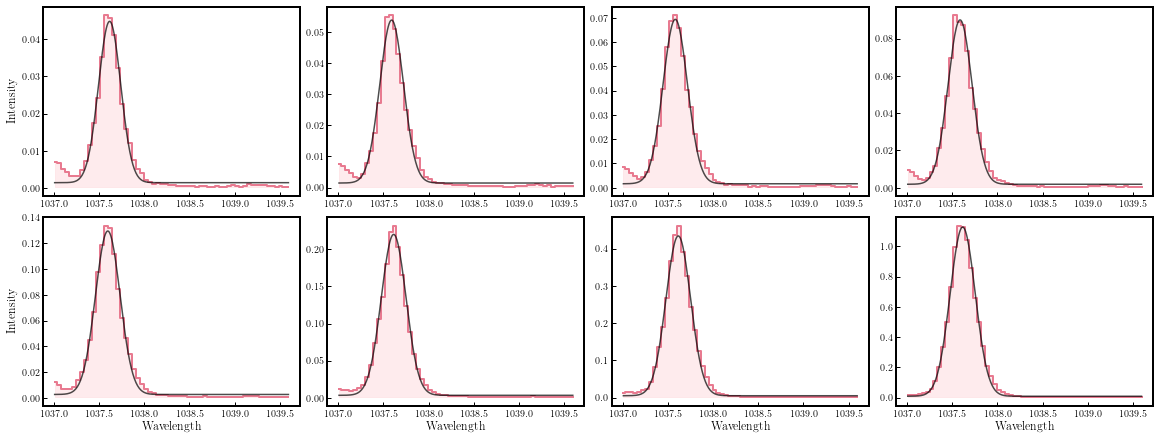

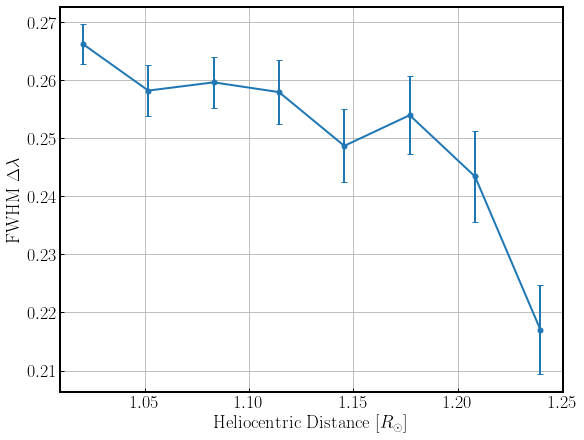

In [26]:
int_OVI_1037_row = np.average(sumer_509_window[-240:,OVI_1037_slice[0]:OVI_1037_slice[1]].reshape(-1,30,OVI_1037_slice[1]-OVI_1037_slice[0]),axis=1)

OVI_1037_fit_row_model = SpectrumFitRow(data=int_OVI_1037_row,wvl=wvl_OVI_1037,err=None,
                                      same_width=False,line_number=1,line_wvl_init=[1037.6],
                                      int_max_init=[1],fwhm_init=[0.2])
OVI_1037_fit_row_model.run_lse()
OVI_1037_fit_row_model.plot_fit()
OVI_1037_fit_row_model.fwhm_fit = con_width_funct_4(1,OVI_1037_fit_row_model.line_wvl_fit,1, OVI_1037_fit_row_model.fwhm_fit*1000,DET_B=True)/1000
ax = OVI_1037_fit_row_model.plot_variation(xdata=np.flip(np.average(sumer_ycoord[:240].reshape(-1,30),axis=1))/960,
                                            xlabel=r"Heliocentric Distance $\left[R_\odot \right]$")
ax.grid("on")

In [27]:
OVI_1032_fit_row_model.int_total_fit/OVI_1037_fit_row_model.int_total_fit

array([[0.4 ],
       [0.41],
       [0.4 ],
       [0.39],
       [0.39],
       [0.39],
       [0.41],
       [0.44]])

In [29]:
np.flip(np.average(sumer_ycoord[:240].reshape(-1,30),axis=1))/960

array([1.24, 1.21, 1.18, 1.15, 1.11, 1.08, 1.05, 1.02])

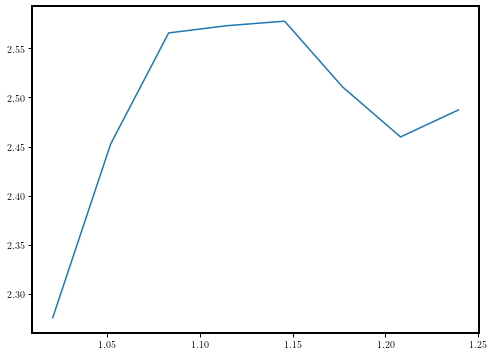

In [30]:
fig, ax = plt.subplots(figsize=(8,6))
ax.plot(np.flip(np.average(sumer_ycoord[:240].reshape(-1,30),axis=1))/960,
OVI_1032_fit_row_model.int_total_fit/OVI_1037_fit_row_model.int_total_fit)

/Users/yjzhu/Desktop/Solar/MyPy/sumerpy.py:457: UserWarning: No test phase set by default.
  warn("No test phase set by default.")


FWHM after removing instrumental broadening:  [295.97]


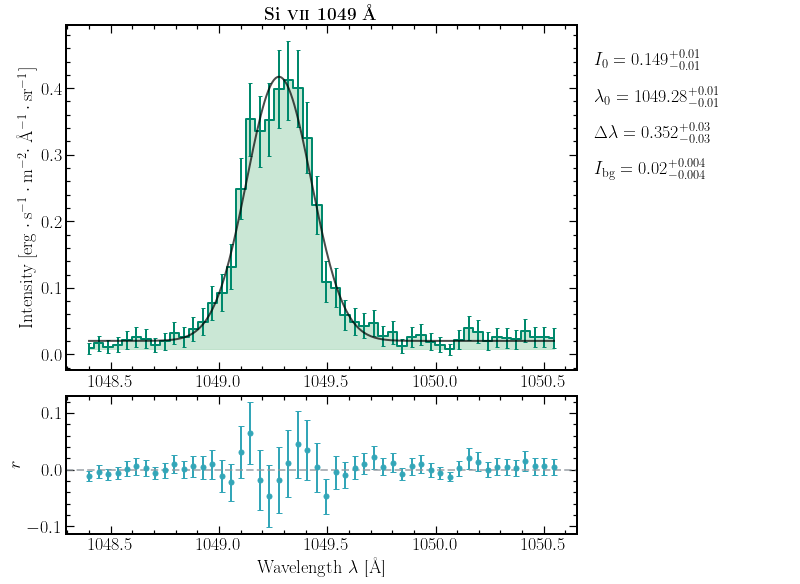

In [46]:
SiVII_1049_slice = (760,810)
wvl_SiVII_1049 = wvl_509[SiVII_1049_slice[0]:SiVII_1049_slice[1]]
radiometry_SiVII_1049 = radiometry(1,wvl_SiVII_1049,1,np.ones_like(wvl_SiVII_1049),bare=True,kbr=False,photons=False,watts=True,det_a=False,
                                det_b=True,joint=False,separate=True)*1.e3
int_SiVII_1049 = np.average(sumer_509_window[-30:,SiVII_1049_slice[0]:SiVII_1049_slice[1]],axis=0)*radiometry_SiVII_1049
err_SiVII_1049 = np.sqrt(np.sum(300*sumer_509_window[-30:,SiVII_1049_slice[0]:SiVII_1049_slice[1]],
                        axis=0))/30/300*radiometry_SiVII_1049
                        
SiVII_1049_fit_model = SpectrumFitSingle(data=int_SiVII_1049,wvl=wvl_SiVII_1049,err=err_SiVII_1049,
                                      same_width=False,line_number=1,line_wvl_init=[1049.3],
                                      int_max_init=[0.05],fwhm_init=[0.2])
#SiVII_1049_fit_model.plot(plot_fit=False,plot_params=False)
#SiVII_1049_fit_model.run_lse()
SiVII_1049_fit_model.run_HahnMC(n_chain=10000)
SiVII_1049_fit_model.plot(plot_title=r"\textbf{Si \textsc{vii} 1049 \mbox{\AA}}",plot_hmc=True,
                                 xlabel=r"Wavelength $\lambda$ [\mbox{\AA}]",
                               ylabel=r"Intensity $\mathrm{[erg\cdot s^{-1}\cdot m^{-2}\cdot}$ \mbox{\AA}$\mathrm{^{-1}\cdot sr^{-1}]}$",
                              color_style="Green")
print("FWHM after removing instrumental broadening: ",
con_width_funct_4(1,SiVII_1049_fit_model.line_wvl_fit_hmc,1,SiVII_1049_fit_model.fwhm_fit_hmc*1000,DET_B=True))


/Users/yjzhu/Desktop/Solar/MyPy/sumerpy.py:457: UserWarning: No test phase set by default.
  warn("No test phase set by default.")


FWHM after removing instrumental broadening:  [243.96]


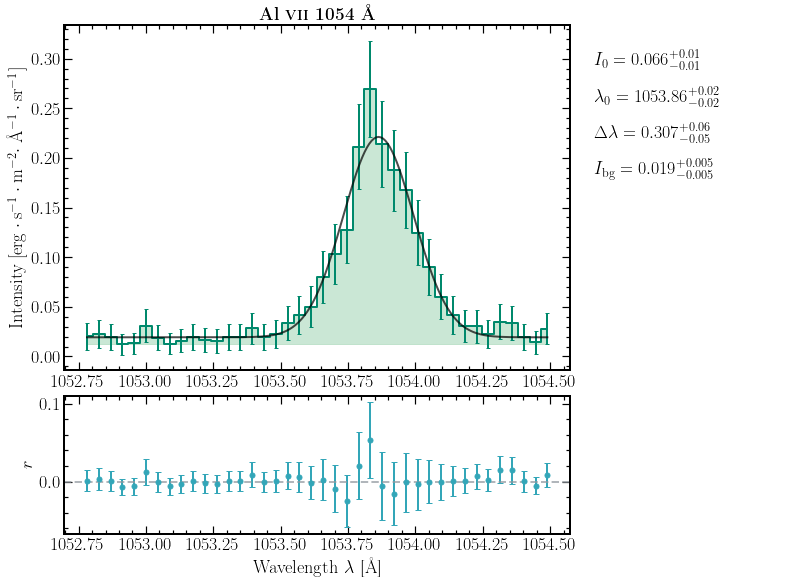

In [47]:
AlVII_1054_slice = (860,900)
wvl_AlVII_1054 = wvl_509[AlVII_1054_slice[0]:AlVII_1054_slice[1]]
radiometry_AlVII_1054 = radiometry(1,wvl_AlVII_1054,1,np.ones_like(wvl_AlVII_1054),bare=True,kbr=False,photons=False,watts=True,det_a=False,
                                det_b=True,joint=False,separate=True)*1.e3
int_AlVII_1054 = np.average(sumer_509_window[-30:,AlVII_1054_slice[0]:AlVII_1054_slice[1]],axis=0)*radiometry_AlVII_1054
err_AlVII_1054 = np.sqrt(np.sum(300*sumer_509_window[-30:,AlVII_1054_slice[0]:AlVII_1054_slice[1]],
                        axis=0))/30/300*radiometry_AlVII_1054

AlVII_1054_fit_model = SpectrumFitSingle(data=int_AlVII_1054,wvl=wvl_AlVII_1054,err=err_AlVII_1054,
                                      same_width=False,line_number=1,line_wvl_init=[1054],
                                      int_max_init=[0.5],fwhm_init=[0.2])
#AlVII_1054_fit_model.plot(plot_fit=False,plot_params=False)
#AlVII_1054_fit_model.run_lse()
AlVII_1054_fit_model.run_HahnMC(n_chain=10000)
AlVII_1054_fit_model.plot(plot_title=r"\textbf{Al \textsc{vii} 1054 \mbox{\AA}}",plot_hmc=True,
                                 xlabel=r"Wavelength $\lambda$ [\mbox{\AA}]",
                               ylabel=r"Intensity $\mathrm{[erg\cdot s^{-1}\cdot m^{-2}\cdot}$ \mbox{\AA}$\mathrm{^{-1}\cdot sr^{-1}]}$",
                              color_style="Green")
print("FWHM after removing instrumental broadening: ",
con_width_funct_4(1,AlVII_1054_fit_model.line_wvl_fit_hmc,1,AlVII_1054_fit_model.fwhm_fit_hmc*1000,DET_B=True))